# Overfitting and Underfitting

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Simulate data

Simulate from a 2nd order polynomial with Gaussian noise i.e.

$y = a_0 + a_1x + a_2x^2 + \epsilon$

where $\epsilon \sim \mathcal{N}(0,1)$ (the error is standard normal distrubuted)

In [33]:
samples = 100
X = np.random.uniform(-3,3, (samples, 1))

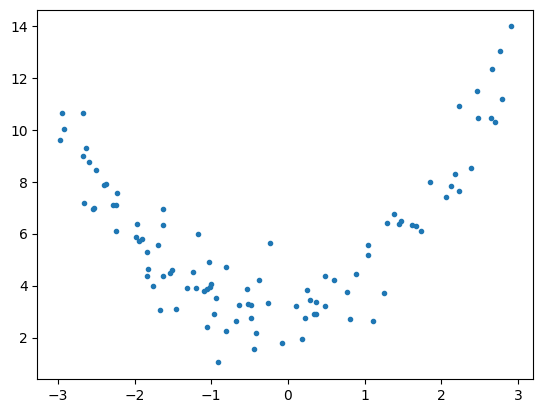

In [34]:
# a0 = 3, a1 = 0.5, a2 = 1
f = lambda x: x**2 + .5*x + 3
# y = a0 + a1x + a2x^2 + epsilon
y = f(X) + np.random.randn(samples, 1)

# Linspace gives equally spaced numbers between low and high
# Between -3 and 3 we get 100 equally spaced numbers
x = np.linspace(-3,3, samples )
plt.plot(X,y, '.')


<Axes: title={'center': '$y = x^2+0.5+3+\\epsilon$'}>

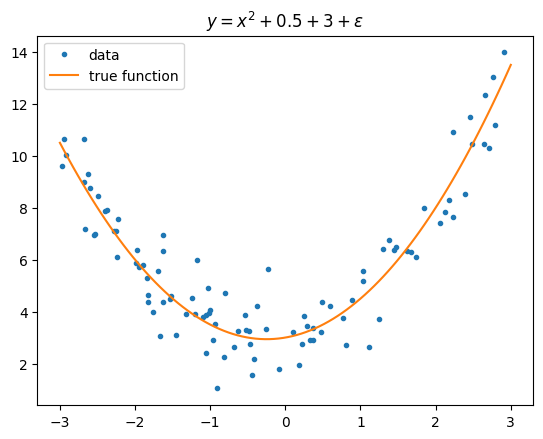

In [35]:
def draw_data():
    fig, ax = plt.subplots()
    ax.plot(X,y, '.', label="data")
    ax.plot(x, f(x), label="true function")
    ax.set(title = r"$y = x^2+0.5+3+\epsilon$")
    ax.legend()

    return ax
draw_data()
    

## Polynomial regression

In [36]:
from sklearn.preprocessing import PolynomialFeatures

# include_bias = True -> a column of ls are included, and if false its excluded
# we use False as LinearRegression() handles the bias
# instantiate a PolynomialFeatures instance from the PolynomialFeatures class
poly = PolynomialFeatures(degree = 2, include_bias=False)

poly_features = poly.fit_transform(X)
poly_features[:5], poly_features.shape

(array([[-2.28129654,  5.20431389],
        [ 1.66606682,  2.77577863],
        [ 0.33416328,  0.11166509],
        [ 2.46215696,  6.0622169 ],
        [ 1.4770591 ,  2.18170359]]),
 (100, 2))

### Train on transformed dataset

- use multiple linear regression on our polynomial features
- this gives us polynomial regression of second order

In [39]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(poly_features, y)

# estimated: a1, a2 from data, note that true value was a1 = 0.5, a2 = 1
model.coef_

array([[0.48664705, 0.98765545]])

In [40]:
# estimated a0 from data, note that true a0 = 3
model.intercept_

array([3.01702076])

In [44]:
# x is our linspace, its 1 dimensional
x[:5], x.shape

(array([-3.        , -2.93939394, -2.87878788, -2.81818182, -2.75757576]),
 (100,))

### Visualise true model and estimated model

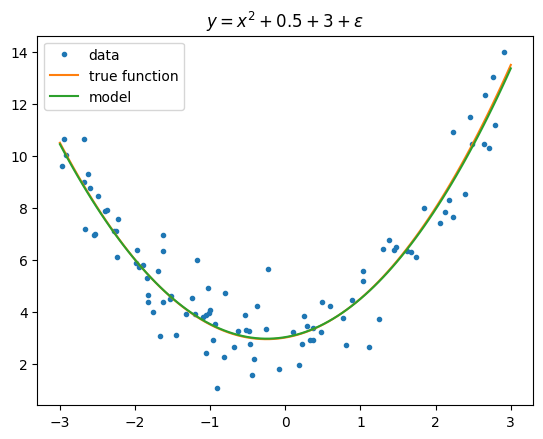

In [45]:
x_poly_features = poly.transform(x.reshape(-1,1))
y_pred = model.predict(x_poly_features)

ax = draw_data()
ax.plot(x, y_pred, label="model")
ax.legend()

[Text(0.5, 1.0, 'Underfitting, model too simple')]

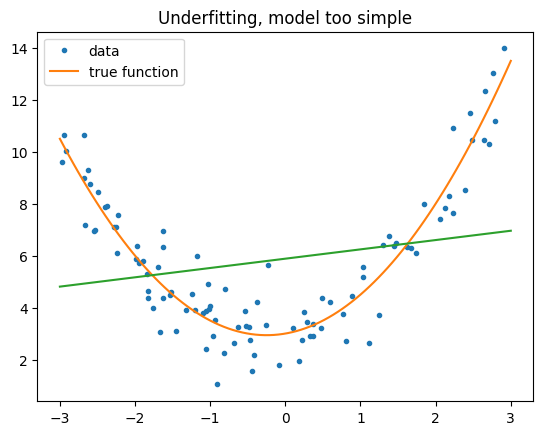

In [47]:
model = LinearRegression()
# we haven't transformed the feature space, so we get a linear model
model.fit(X,y)
ax = draw_data()
ax.plot(x, model.predict(x.reshape(-1,1)))
ax.set(title="Underfitting, model too simple")

## Overfitting

In [48]:
poly_model_30 = PolynomialFeatures(30, include_bias=False)

X_features = poly_model_30.fit_transform(X)
X_features.shape

(100, 30)

In [53]:
model = LinearRegression()
model.fit(X_features, y)

x = np.linspace(-3,3, samples)

In [54]:
x_poly_features = poly_model_30.transform(x.reshape(-1,1))
x_poly_features.shape

(100, 30)

[Text(0.5, 1.0, 'Overfitting, model too complex'), (1.0, 15.0)]

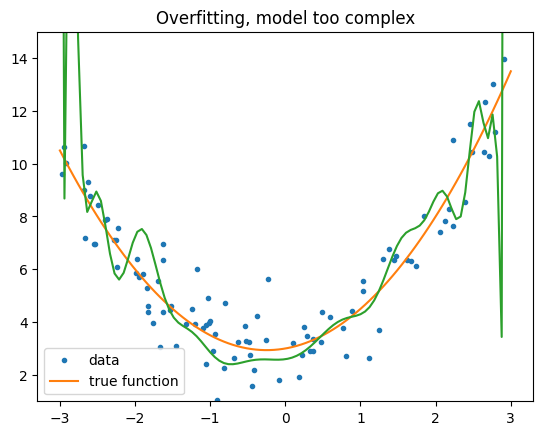

In [57]:
ax = draw_data()
ax.plot(x, y_pred)
ax.set(title="Overfitting, model too complex", ylim=[1,15])

## Choose a model

In [59]:
# Simulate new data
samples = 10000
X = np.random.uniform(-3,3, (samples, 1))
X.shape

(10000, 1)

In [60]:
f = lambda x: x**4 + x**2 + .5*x + 3
y = f(X)+np.random.rand(samples, 1)

y.shape

(10000, 1)

### Train|Validation|Test split

Split dataset into
- train - train on training set
- validation - tune hyperparameter on validation set
- test - evaluate on test set

In our case the degree is a hyperparameter

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)

# Use test set and take half of it to use as test and half as validation
X_val, X_test, y_val, y_test = train_test_split(
    X_test, y_test, test_size=0.5, random_state=42
)

# 2/3 train -> 6700
# 1/3/2 val
# 1/3/2 test

X_train.shape, X_val.shape, X_test.shape

((6700, 1), (1650, 1), (1650, 1))

### Train model and predict on validation

In [68]:
from sklearn.metrics import mean_squared_error

RMSE_val = []

for degree in range(1,100):
    model_poly = PolynomialFeatures(degree, include_bias=False)
    # Feature engineering -> transformed feature space
    train_features = model_poly.fit_transform(X_train)
    val_features = model_poly.transform(X_val)
    model_lin_reg = LinearRegression()
    # Polynomial regression - trains on transformed feature space
    model_lin_reg.fit(train_features, y_train)
    # Predict on validation data
    y_pred_val = model_lin_reg.predict(val_features)

    RMSE_val.append(np.sqrt(mean_squared_error(y_val, y_pred_val)))

[Text(0.5, 0, 'Degree'),
 Text(0, 0.5, 'RMSE'),
 Text(0.5, 1.0, 'RMSE on validation data for different degrees of polynomials')]

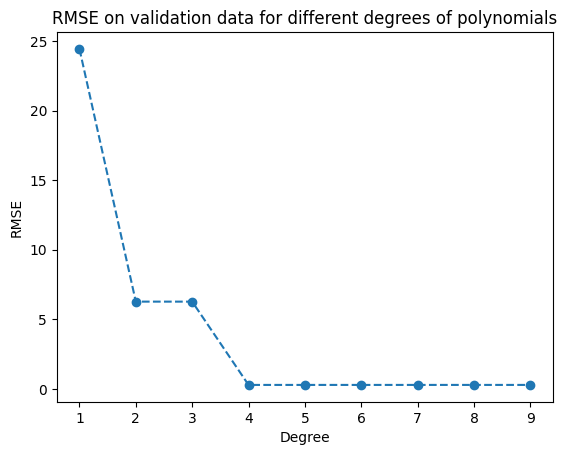

In [71]:
fig, ax = plt.figure(), plt.axes()

ax.plot(range(1,10), RMSE_val[:9], "--o", label="Validation")
ax.set(xlabel = "Degree", ylabel = "RMSE", title = "RMSE on validation data for different degrees of polynomials")